<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Plot Output of Neural Networks with One Hidden Layer and Activations for Each Iteration of Gradient Descent</font></h1> 

# Table of Contents
In this lab, you will use a single-layer neural network to classify handwritten digits from the MNIST database.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Helper Functions</a></li>
<li><a href="#ref1">Neural Network Module and Training Function</a></li>
<li><a href="#ref2">Prepare Data</a></li>
<li><a href="#ref3">Define the Neural Network, Criterion Function, Optimizer, and Train the  Model</a></li>

<li><a href="#ref4">Practice Question</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

Import the following libraries:

In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

<a id="ref0"></a>
<h2 align=center>Helper Functions</h2>

In [2]:
def PlotStuff(X,Y,model,epoch,leg=True):
    plt.plot(X.numpy(),model(X).detach().numpy(),label='epoch '+str(epoch))
    plt.plot(X.numpy(),Y.numpy(),'r')
    plt.xlabel('x')
    if leg==True:
        plt.legend()
    else:
        pass

<a id="ref1"></a>
<h2 align=center>Neural Network Module and Training Function </h2> 

Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 

In [3]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
        #define the first linear layer as an attribute, this is not good practice
        self.a1=None
        self.l1=None
        
    def forward(self,x):
        self.l1=self.linear1(x)
        self.a1=F.sigmoid(self.l1)
        yhat=F.sigmoid(self.linear2(self.a1))
        return yhat

Define the training function:

In [4]:
def train(Y,X,model,optimizer,criterion,epochs=1000):
    error=[]

    for epoch in range(epochs):

        for y,x in zip(Y,X):
            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
           #clear gradient 
            optimizer.zero_grad()
        error.append(loss.item())
        if epoch % 300==0:    
            PlotStuff(X,Y,model,epoch,leg=True)
            plt.show()
            model(X)
            plt.scatter( model.a1.detach().numpy()[:,0], model.a1.detach().numpy()[:,1],c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return  error

<a id="ref2"></a>
<h2 align=center>Prepare Data </h2>

In [16]:
X=torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor )
Y=torch.zeros(X.shape[0])
Y[(X[:,0]>-4)& (X[:,0]<4)]=1.0

<a id="ref3"></a>
<h2 align=center>Define the Neural Network, Criterion Function, Optimizer. and Train the  Model</h2>

Create the Cross-Entropy loss function: 

In [17]:
def criterion_cross(outputs,labels):
    out=-1*torch.mean(labels*torch.log(outputs) +(1-labels)*torch.log(1-outputs))
    return out

Define the Neural Network, Optimizer, and Train the Model:

/home/jupyterlab/conda/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


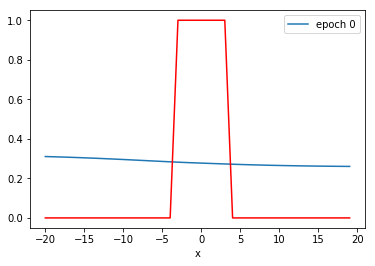

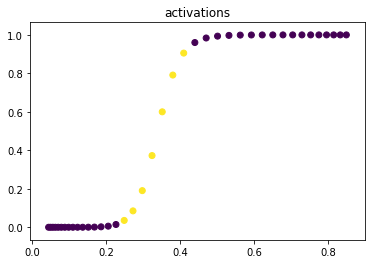

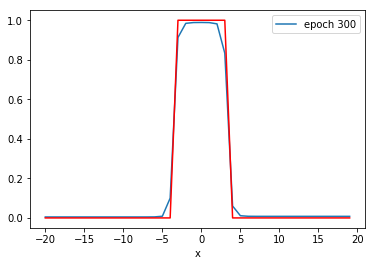

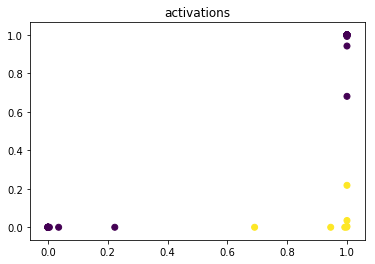

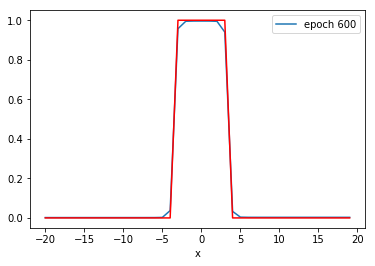

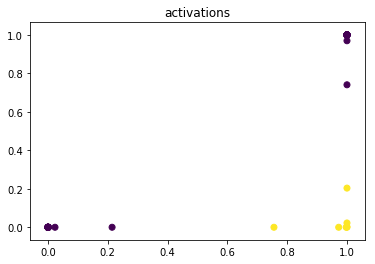

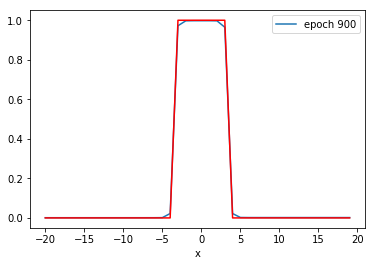

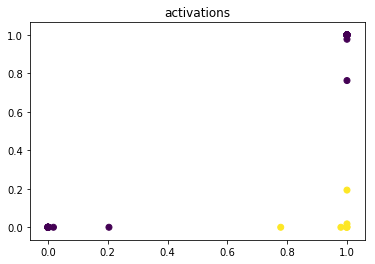

Text(0.5,1,'cross entropy loss ')

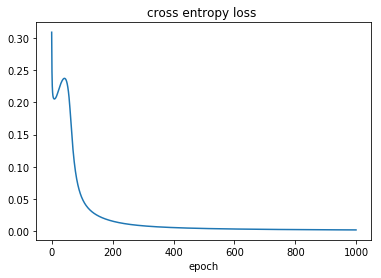

In [18]:
D_in=1
H=2
D_out=1

learning_rate=0.1
model=Net(D_in,H,D_out)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_cross=train(Y,X,model,optimizer,criterion_cross,epochs=1000)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss ')

By examining the output of the  activation, you see by the 600th epoch that the data has been mapped to a linearly separable space.

<a id="ref3"></a>
<h2 align=center>Practice Question </h2>

Repeat the previous steps above by using the MSE cost or total loss: 


/home/jupyterlab/conda/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


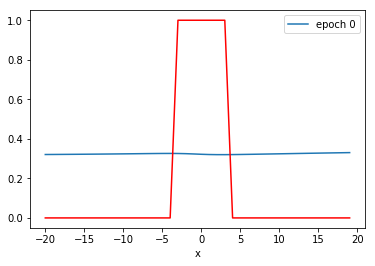

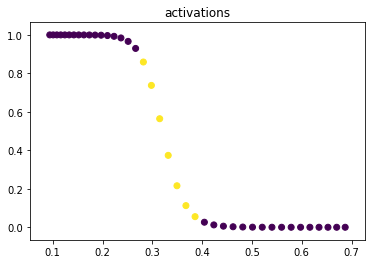

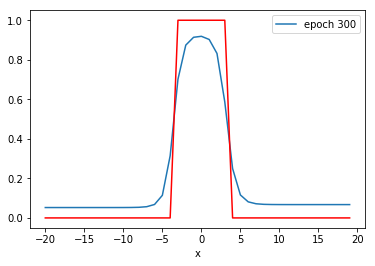

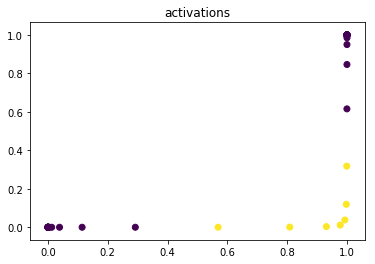

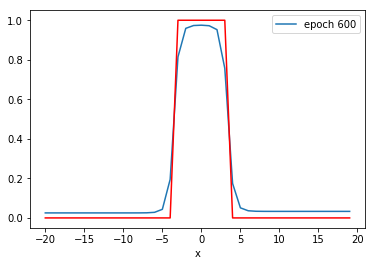

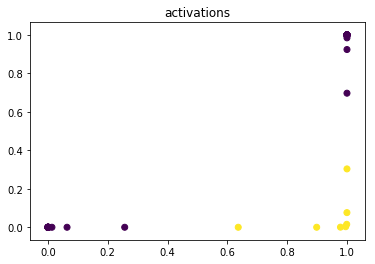

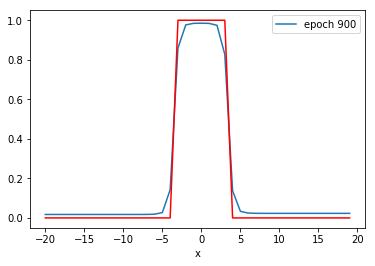

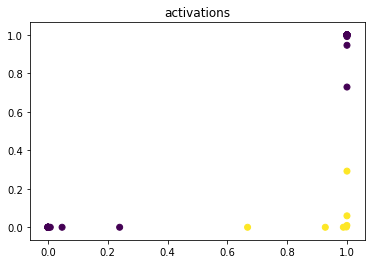

Text(0.5,1,'MSE loss ')

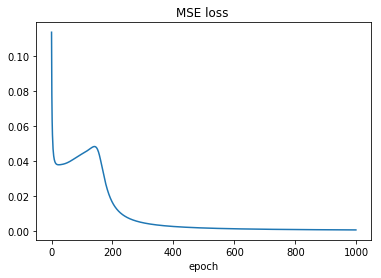

In [20]:
learning_rate=0.1
criterion_mse=nn.MSELoss()
model=Net(D_in,H,D_out)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_mse=train(Y,X,model,optimizer,criterion_mse,epochs=1000)
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('MSE loss ')

Double-click __here__ for the solution.

<!-- 
learning_rate=0.1
criterion_mse=nn.MSELoss()
model=Net(D_in,H,D_out)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_mse=train(Y,X,model,optimizer,criterion_mse,epochs=1000)
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('MSE loss ')
-->

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) 
      <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).